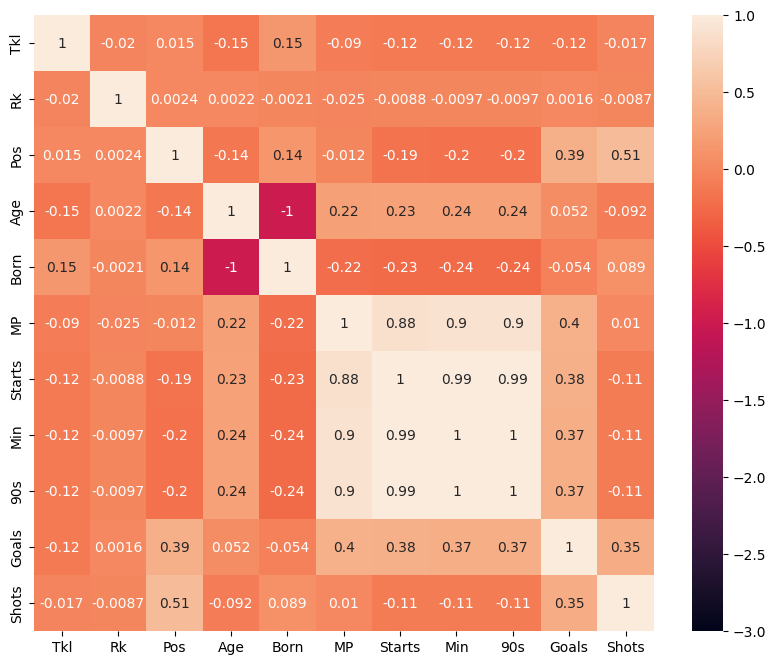

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
datos = pd.read_csv("conjunto_entrenamiento.csv")

# crear un mapa de calor, el csv contiene muchos datos que son cadenas asi que solo se tomaran en cuenta los datos numericos
datos_numericos = datos.select_dtypes(include=['number'])

# seleccionar siempre la primera columna y las columnas del 25 al 50
atributo = 67
columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(0, 10))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(10, 20))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(20, 30))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(30, 40))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(40, 50))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(50, 60))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(60, 70))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(70, 80))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(80, 90))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(90, 100))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(100, 110))]
# columnas_numericas = datos.select_dtypes(include=['number']).iloc[:, [atributo] + list(range(110, 120))]

# Calcular la correlación
correlaciones = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlaciones, annot=True, vmin=-3, vmax=1)

plt.show()


In [25]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cargar el archivo CSV
datos_entrenamiento = pd.read_csv("conjunto_entrenamiento.csv")
datos_numericos_ent = datos_entrenamiento.select_dtypes(include=['number'])

datos_prueba = pd.read_csv("conjunto_prueba.csv")
datos_numericos_test = datos_prueba.select_dtypes(include=['number'])

# Separar características (X) y variable objetivo (y)
x_train = datos_numericos_ent.drop(columns=['Tkl'])
y_train = datos_numericos_ent['Tkl']
x_test = datos_numericos_test.drop(columns=['Tkl'])
y_test = datos_numericos_test['Tkl']

model = LinearRegression()
# fit_intercept=True: Calcula la ordenada al origen.
# normalize='deprecated': Normaliza las variables explicativas (obsoleto desde sklearn 0.24).
# copy_X=True: Realiza una copia de X.
# n_jobs=None: Número de CPUs a usar (None significa 1, -1 usa todas las CPUs disponibles).
# positive=False: Restringe los coeficientes para que sean positivos.
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): ", mse)


r2_score_value = r2_score(y_test, y_pred)

print("Puntuación R^2:", r2_score_value*100)


Error cuadrático medio (MSE):  2.246578539654576e-05
Puntuación R^2: 99.99912161114662


In [5]:
import pickle
file_model = open("PrediccionTkl99.pkl", "wb")
with file_model as f:
    pickle.dump((model), f)

file_model.close()